In [4]:
def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text




start two dogs are playing in in in in in in field end





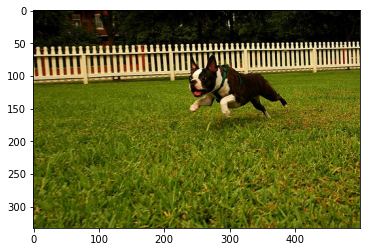

In [8]:
# -*- coding: utf-8 -*-
"""testing_caption_generator.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1ziX3-a1k4ZqE7CVzfluiJZBGiTlKGd9a
"""

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.applications.xception import Xception
from keras.models import load_model
from pickle import load
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import argparse



def extract_features(filename, model):
        try:
            image = Image.open(filename)
            
        except:
            print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
        image = image.resize((299,299))
        image = np.array(image)
        # for images that has 4 channels, we convert them into 3 channels
        if image.shape[2] == 4: 
            image = image[..., :3]
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        return feature

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
             return word
    return None



def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text

# img_path =# [r'/content/drive/MyDrive/New folder (2)/Flickr8k_Dataset/Flicker8k_Dataset/1001773457_577c3a7d70.jpg',
# r"/content/drive/MyDrive/New folder (2)/Flickr8k_Dataset/Flicker8k_Dataset/1012212859_01547e3f17.jpg",
#img_path= r"/content/drive/MyDrive/New folder (2)/Flickr8k_Dataset/Flicker8k_Dataset/1019604187_d087bf9a5f.jpg",
#img_path = r"/content/drive/MyDrive/New folder (2)/Flickr8k_Dataset/Flicker8k_Dataset/1055623002_8195a43714.jpg",
img_path =r"C:\Users\hariharan.sivakumar\Desktop\Image Captioning\App\test_images\1009434119_febe49276a.jpg"
#path = 'Flicker8k_Dataset/111537222_07e56d5a30.jpg'
# for i in img_path:
max_length = 32
tokenizer = load(open(r"C:\Users\hariharan.sivakumar\Desktop\Image Captioning\App\tokenizer (2).p","rb"))
model = load_model(r'C:\Users\hariharan.sivakumar\Desktop\Image Captioning\App\model_8.h5')
xception_model = Xception(include_top=False, pooling="avg")

photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)
print("\n\n")

In [ ]:

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)
print("\n\n")